<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/NN_Training_Math_Eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

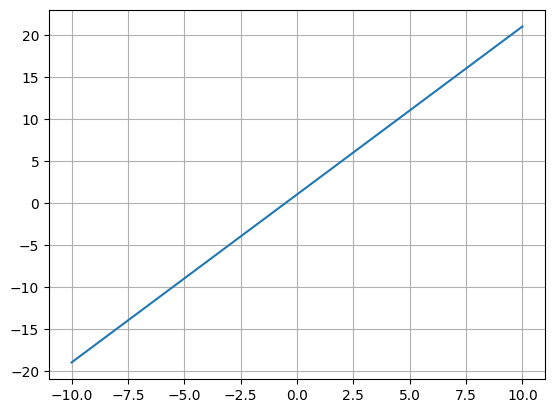

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eq=lambda x,m,c: m*x+c
x = np.linspace(-10, 10, 20)
m = 2
c = 1

y = [eq(i,m,c) for i in x]

#plot x and y showing grrid lines
plt.grid(True)
plt.plot(x,y)
plt.show()

In [2]:
# convert x, m, c and y as columns inside a panda dataframe
import pandas as pd
df = pd.DataFrame({'x':x, 'm':m, 'c':c, 'y':y})
df.head()

,x,m,c,y
0,-10.000000,2,1,-19.000000
1,-8.947368,2,1,-16.894737
2,-7.894737,2,1,-14.789474
3,-6.842105,2,1,-12.684211
4,-5.789474,2,1,-10.578947


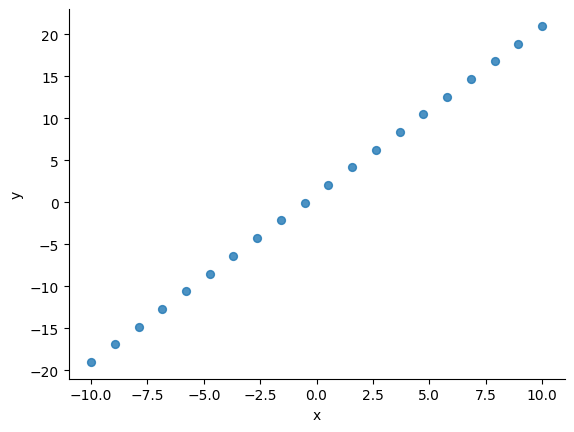

In [3]:
# @title x vs y

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the linear model: 2 inputs → 1 output
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # input_dim=2, output_dim=1

    def forward(self, x):
        return self.linear(x)

# Create synthetic training data
torch.manual_seed(0)
X = torch.randn(1000, 2)  # 1000 samples, 2 features
true_weights = torch.tensor([2.0, 3.0])
true_bias = 5.0
y = X @ true_weights + true_bias
y = y.view(-1, 1)

# Initialize model, loss function, and optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Print learned weights and bias
weights = model.linear.weight.data.numpy()
bias = model.linear.bias.data.numpy()
print(f"\nLearned equation: y = {weights[0][0]:.2f}x1 + {weights[0][1]:.2f}x2 + {bias[0]:.2f}")

Epoch 0, Loss: 36.5625
Epoch 50, Loss: 27.5953
Epoch 100, Loss: 20.6353
Epoch 150, Loss: 15.3495
Epoch 200, Loss: 11.3550
Epoch 250, Loss: 8.3424
Epoch 300, Loss: 6.0781
Epoch 350, Loss: 4.3867
Epoch 400, Loss: 3.1333
Epoch 450, Loss: 2.2125
Epoch 500, Loss: 1.5422
Epoch 550, Loss: 1.0595
Epoch 600, Loss: 0.7162
Epoch 650, Loss: 0.4756
Epoch 700, Loss: 0.3099
Epoch 750, Loss: 0.1979
Epoch 800, Loss: 0.1237
Epoch 850, Loss: 0.0757
Epoch 900, Loss: 0.0453
Epoch 950, Loss: 0.0265

Learned equation: y = 2.00x1 + 3.01x2 + 4.88


### Decrease leaning rate and increase epochs.

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the linear model: 2 inputs → 1 output
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # input_dim=2, output_dim=1

    def forward(self, x):
        return self.linear(x)

# Create synthetic training data
torch.manual_seed(0)
X = torch.randn(1000, 2)  # 1000 samples, 2 features
true_weights = torch.tensor([2.0, 3.0])
true_bias = 5.0
y = X @ true_weights + true_bias
y = y.view(-1, 1)

# Initialize model, loss function, and optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10000):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Print learned weights and bias
weights = model.linear.weight.data.numpy()
bias = model.linear.bias.data.numpy()
print(f"\nLearned equation: y = {weights[0][0]:.2f}x1 + {weights[0][1]:.2f}x2 + {bias[0]:.2f}")

Epoch 0, Loss: 36.5625
Epoch 500, Loss: 27.7219
Epoch 1000, Loss: 20.8115
Epoch 1500, Loss: 15.4429
Epoch 2000, Loss: 11.2936
Epoch 2500, Loss: 8.1036
Epoch 3000, Loss: 5.6730
Epoch 3500, Loss: 3.8514
Epoch 4000, Loss: 2.5172
Epoch 4500, Loss: 1.5654
Epoch 5000, Loss: 0.9088
Epoch 5500, Loss: 0.4789
Epoch 6000, Loss: 0.2207
Epoch 6500, Loss: 0.0847
Epoch 7000, Loss: 0.0254
Epoch 7500, Loss: 0.0055
Epoch 8000, Loss: 0.0008
Epoch 8500, Loss: 0.0001
Epoch 9000, Loss: 0.0000
Epoch 9500, Loss: 0.0000

Learned equation: y = 2.00x1 + 3.00x2 + 5.00


### Make intercept term a weight

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the linear model with bias as part of the weights (extra input feature)
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # Now input_dim=3 because we include an extra feature for the bias, and no bias is added in the layer
        self.linear = nn.Linear(3, 1, bias=False)

    def forward(self, x):
        return self.linear(x)

# Create synthetic training data for y = 2x1 + 3x2 + 5
torch.manual_seed(0)
X = torch.randn(1000, 2)  # 1000 samples, 2 features

# Augment X with a column of ones to incorporate the bias term into the weights.
ones = torch.ones(X.shape[0], 1)
X_augmented = torch.cat((X, ones), dim=1)

# True weights for the augmented input: [2, 3, 5]
true_weights = torch.tensor([2.0, 3.0, 5.0])
y = X_augmented @ true_weights.unsqueeze(1)  # Compute y using matrix multiplication
y = y.view(-1, 1)  # Ensure y is (N, 1)

# Initialize model, loss function, and optimizer
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10000):
    outputs = model(X_augmented)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Print learned weights
learned_weights = model.linear.weight.data.numpy()[0]  # [w1, w2, bias]
print(f"\nLearned equation: y = {learned_weights[0]:.2f}x1 + {learned_weights[1]:.2f}x2 + {learned_weights[2]:.2f}")


Epoch 0, Loss: 37.1525
Epoch 500, Loss: 28.1940
Epoch 1000, Loss: 21.1744
Epoch 1500, Loss: 15.7127
Epoch 2000, Loss: 11.4912
Epoch 2500, Loss: 8.2488
Epoch 3000, Loss: 5.7807
Epoch 3500, Loss: 3.9306
Epoch 4000, Loss: 2.5739
Epoch 4500, Loss: 1.6050
Epoch 5000, Loss: 0.9355
Epoch 5500, Loss: 0.4958
Epoch 6000, Loss: 0.2302
Epoch 6500, Loss: 0.0893
Epoch 7000, Loss: 0.0272
Epoch 7500, Loss: 0.0060
Epoch 8000, Loss: 0.0009
Epoch 8500, Loss: 0.0001
Epoch 9000, Loss: 0.0000
Epoch 9500, Loss: 0.0000

Learned equation: y = 2.00x1 + 3.00x2 + 5.00


### Non linear equation

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

# Non-linear target function
def target_function(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    return torch.sin(2 * x1) + torch.log(torch.abs(x2) + 1) + x1 * x2 + 3

# Create synthetic dataset
torch.manual_seed(0)
X = torch.randn(5000, 2)
y = target_function(X).view(-1, 1)

# Define a non-linear model (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Setup training
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10000):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Example prediction
test_input = torch.tensor([[1.0, 2.0]])
predicted = model(test_input).item()
expected = target_function(test_input).item()
print(f"\nPredicted: {predicted:.4f}, Expected: {expected:.4f}")

Epoch 0, Loss: 13.874089
Epoch 500, Loss: 0.078893
Epoch 1000, Loss: 0.031634
Epoch 1500, Loss: 0.020645
Epoch 2000, Loss: 0.012040
Epoch 2500, Loss: 0.005141
Epoch 3000, Loss: 0.002684
Epoch 3500, Loss: 0.001842
Epoch 4000, Loss: 0.001523
Epoch 4500, Loss: 0.001280
Epoch 5000, Loss: 0.001077
Epoch 5500, Loss: 0.000965
Epoch 6000, Loss: 0.000866
Epoch 6500, Loss: 0.000782
Epoch 7000, Loss: 0.000700
Epoch 7500, Loss: 0.000641
Epoch 8000, Loss: 0.000586
Epoch 8500, Loss: 0.000561
Epoch 9000, Loss: 0.000499
Epoch 9500, Loss: 0.000498

Predicted: 6.9980, Expected: 7.0079


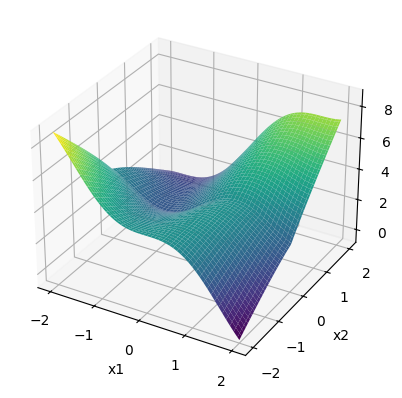

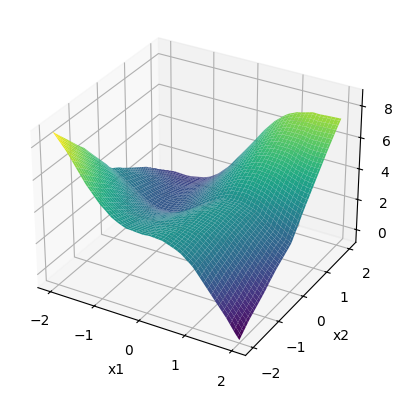

0.00045892264461144805

In [54]:
# Plot 2d graph with x1 and x2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Convert NumPy arrays to PyTorch tensors before passing to target_function
X_torch = torch.tensor(np.stack((X1.ravel(), X2.ravel()), axis=1), dtype=torch.float32)
Y = target_function(X_torch).detach().numpy().reshape(X1.shape) # Convert back to NumPy for plotting

ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

## add orig y to the plot in diffeent color
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)s

X_torch = torch.tensor(np.stack((X1.ravel(), X2.ravel()), axis=1), dtype=torch.float32)
Y_pred =  model(X_torch).detach().numpy().reshape(X1.shape) # Convert back to NumPy for plotting
ax.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y_pred')
plt.show()

## what is MSE btween Y and Y_preed
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_pred)